# NEST Cerebellar Models



In [1]:
from src import simulation
from src import analysis
from src import visualization


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug 27 2024 04:38:39

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
results = simulation.example_simulation()
# Waiting time: ~ 1:20 min

Created 2500 granule cells.
Created 64 Purkinje cells.
Created 150 interneurons.
Created 30 Golgi cells.
Created 20 deep cerebellar nuclei cells.
Created 1500 mossy fibers.
Created 64 climbing fibers.
Number of mossy -> granule connections: 187731
Number of mossy -> golgi connections: 9012
Number of mossy -> DCN connections: 30000
Number of granule -> golgi connections: 766
Number of granule -> purkinje connections: 144032
Number of granule -> interneuron connections: 112411
Number of golgi -> granule connections: 7550
Number of golgi -> golgi connections: 191
Number of climbing -> purkinje connections: 64
Number of interneuron -> purkinje connections: 1938
Number of interneuron -> interneuron connections: 9051
Number of purkinje -> DCN connections: 320
Network setup complete.
Simulation running...
Simulation complete.


In [3]:
## Analyze spatial results

# To make the analysis faster, we can skip the correlation analysis (~ 1hr)
skip_correlations = False

PC_spike_data = results["purkinje_spikes"]
PC_voltage_data = results["purkinje_voltages"]
GrC_spike_data = results["granule_spikes"]
GrC_voltage_data = results["granule_voltages"]
GoC_spike_data = results["golgi_spikes"]
GoC_voltage_data = results["golgi_voltages"]

PC_spike_results = analysis.analyze_spike_data(PC_spike_data, skip_correlations=skip_correlations)
GrC_spike_results = analysis.analyze_spike_data(GrC_spike_data, skip_correlations=skip_correlations)
GoC_spike_results = analysis.analyze_spike_data(GoC_spike_data, skip_correlations=skip_correlations)

PC_isis = analysis.get_isi_distribution(PC_spike_results["spike_trains"])
GrC_isis = analysis.get_isi_distribution(GrC_spike_results["spike_trains"])
GoC_isis = analysis.get_isi_distribution(GoC_spike_results["spike_trains"])

Starting spike data analysis with 2954 spikes from 64 neurons.
Created 64 spike trains.
Firing rates calculated - average: 46.19 Hz
ISI CV calculated - 64 valid values, average: 0.00
Calculating spike correlations for 64 neurons...


100%|██████████| 64/64 [00:00<00:00, 96.52it/s] 


Average spike correlation: 0.54
Starting spike data analysis with 173166 spikes from 2500 neurons.
Created 2500 spike trains.
Firing rates calculated - average: 69.27 Hz
ISI CV calculated - 2500 valid values, average: 0.08
Calculating spike correlations for 2500 neurons...


100%|██████████| 2500/2500 [17:15<00:00,  2.41it/s]


Average spike correlation: 0.06
Starting spike data analysis with 5772 spikes from 30 neurons.
Created 30 spike trains.
Firing rates calculated - average: 192.42 Hz
ISI CV calculated - 30 valid values, average: 0.02
Calculating spike correlations for 30 neurons...


100%|██████████| 30/30 [00:00<00:00, 145.49it/s]


Average spike correlation: 1.00


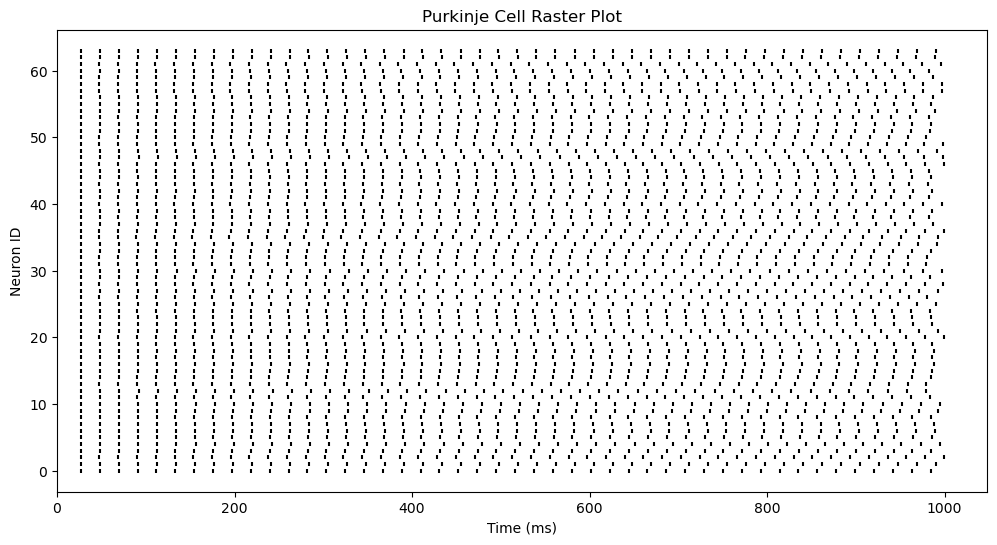

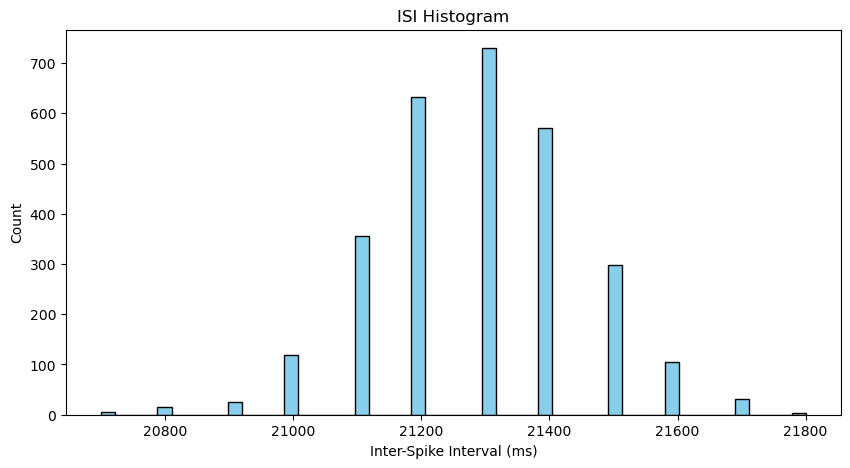

In [4]:
visualization.plot_raster(PC_spike_results, title="Purkinje Cell Raster Plot")
visualization.plot_isi_histogram(PC_isis)

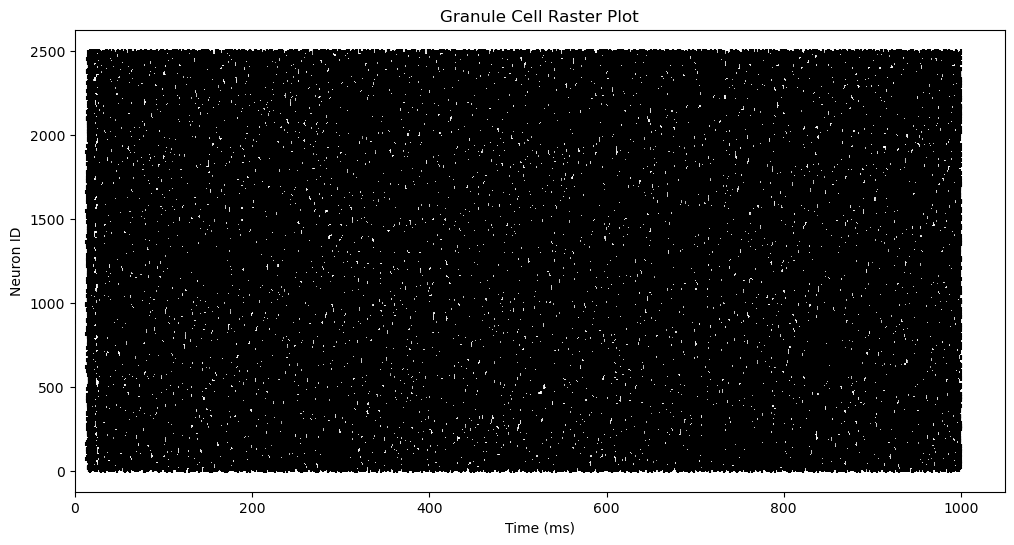

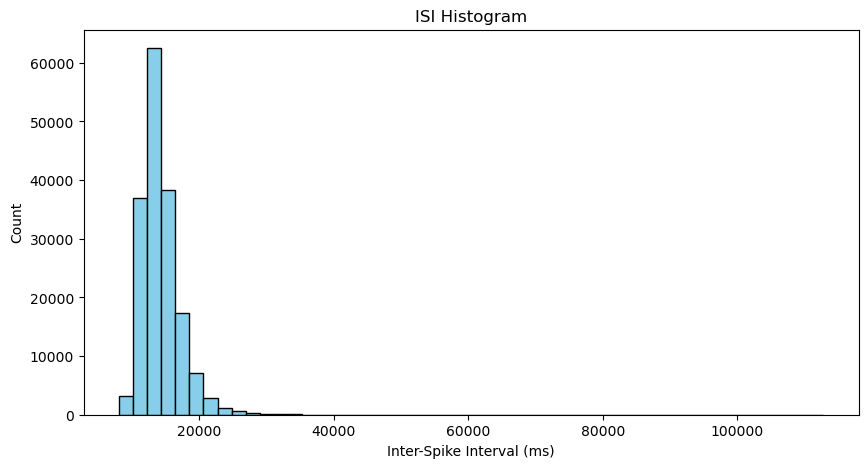

In [5]:
visualization.plot_raster(GrC_spike_results, title="Granule Cell Raster Plot")
visualization.plot_isi_histogram(GrC_isis)

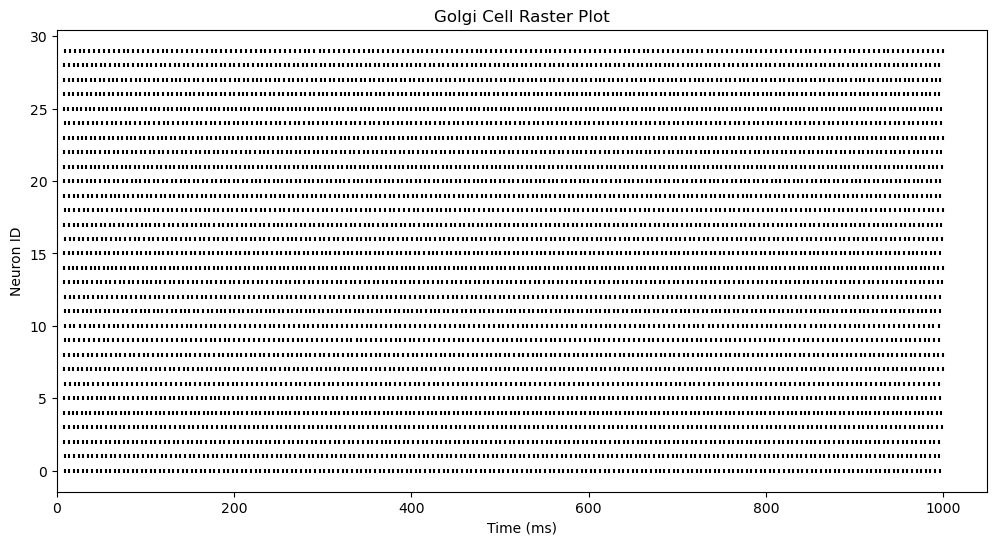

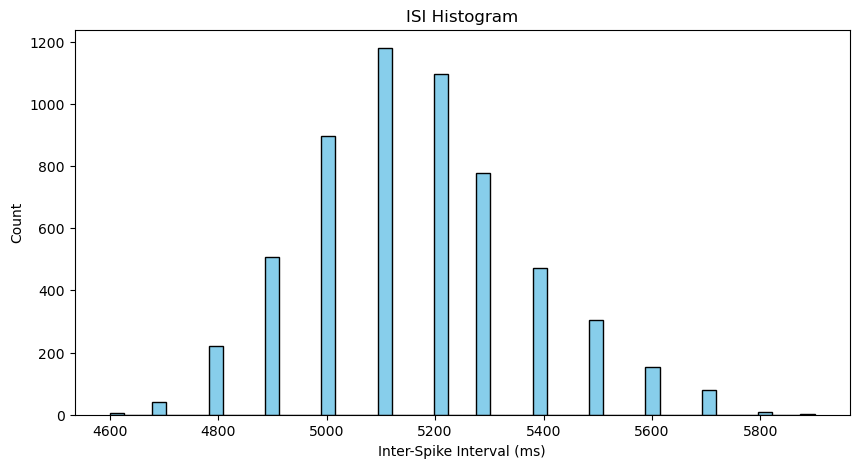

In [6]:
visualization.plot_raster(GoC_spike_results, title="Golgi Cell Raster Plot")
visualization.plot_isi_histogram(GoC_isis)

Visualization of Voltage Traces of the 3 selected Populations:



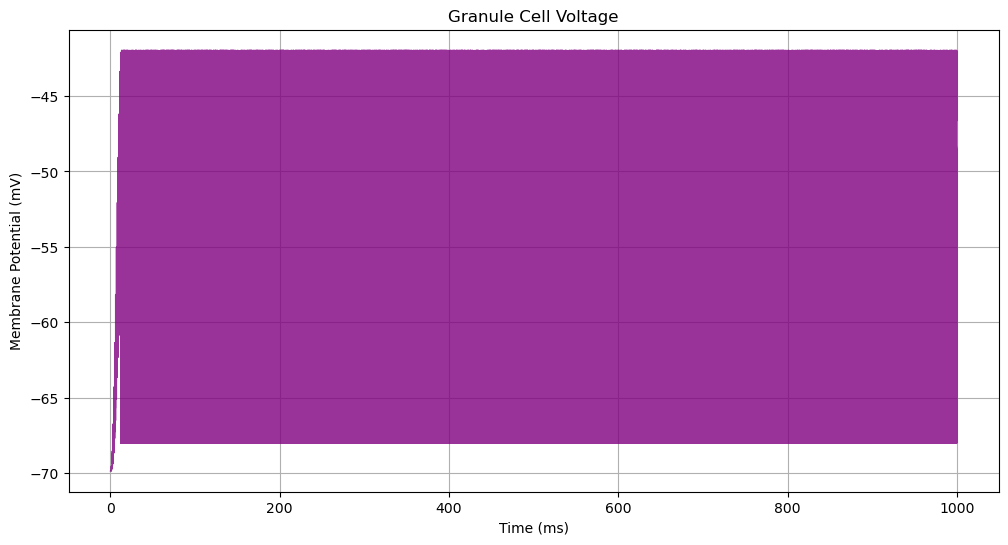

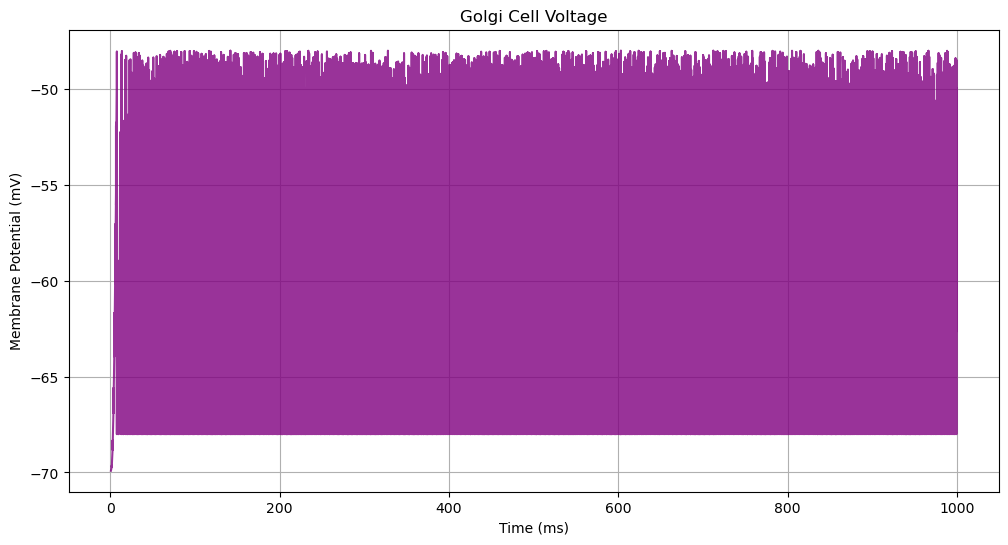

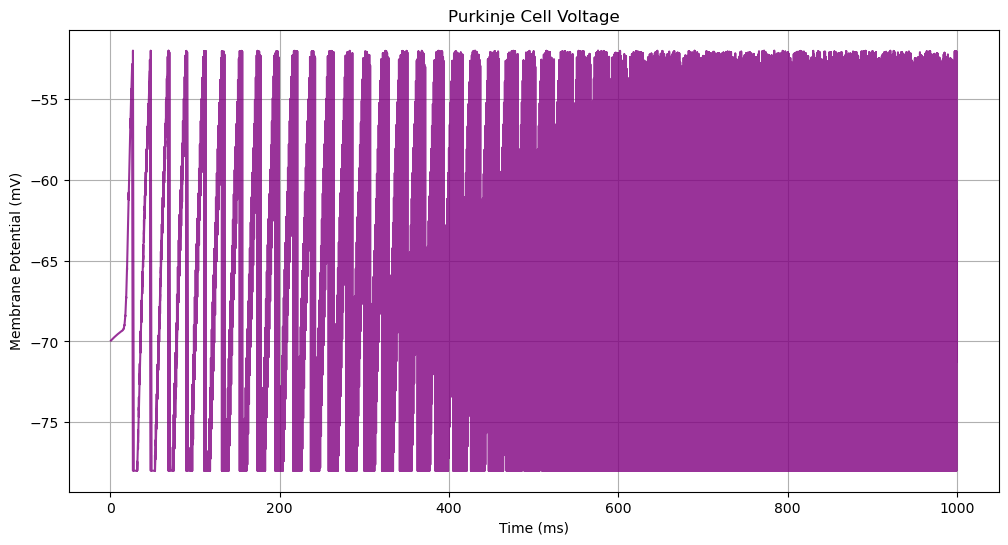

In [7]:
print("Visualization of Voltage Traces of the 3 selected Populations:\n")
visualization.plot_voltage_trace(GrC_voltage_data, title="Granule Cell Voltage")
visualization.plot_voltage_trace(GoC_voltage_data, title="Golgi Cell Voltage")
visualization.plot_voltage_trace(PC_voltage_data, title="Purkinje Cell Voltage")

Purkinje Cell Voltage Analysis:

[Voltage Analysis] Starting analysis...
Analyzing 63936 samples over 998.0 ms
Calculated sampling rate: 64063.13 Hz
Total duration: 1.00 seconds
PSD parameters:
- Segment length: 1.00s (63935 samples)
- Overlap: 50.0%
- Segments: 1
PSD calculation failed: nperseg must be a positive integer
Attempting fallback to simple FFT...

[Voltage Analysis] Results:
- Dominant frequency: 47.09 Hz
- Theta power (4-8 Hz): 3.27e-03 mV²/Hz
- Frequency range: 0.0-32031.6 Hz


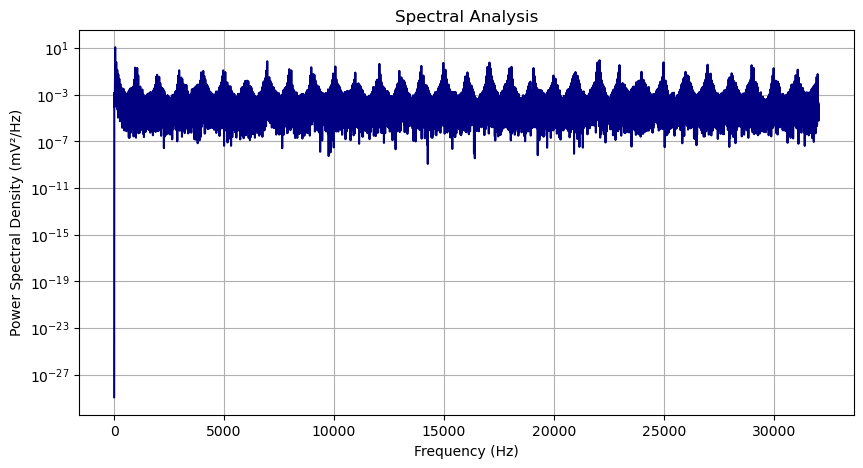


Granule Cell Voltage Analysis:

[Voltage Analysis] Starting analysis...
Analyzing 2497500 samples over 998.0 ms
Calculated sampling rate: 2502504.01 Hz
Total duration: 1.00 seconds
PSD parameters:
- Segment length: 1.00s (2497499 samples)
- Overlap: 50.0%
- Segments: 1
PSD calculation failed: nperseg must be a positive integer
Attempting fallback to simple FFT...

[Voltage Analysis] Results:
- Dominant frequency: 54.11 Hz
- Theta power (4-8 Hz): 1.62e-02 mV²/Hz
- Frequency range: 0.0-1251252.0 Hz


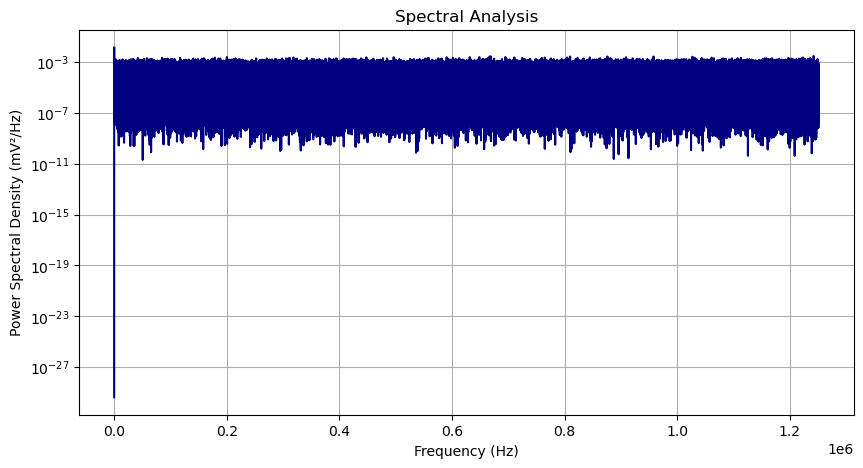


Golgi Cell Voltage Analysis:

[Voltage Analysis] Starting analysis...
Analyzing 29970 samples over 998.0 ms
Calculated sampling rate: 30029.06 Hz
Total duration: 1.00 seconds
PSD parameters:
- Segment length: 1.00s (29969 samples)
- Overlap: 50.0%
- Segments: 1
PSD calculation failed: nperseg must be a positive integer
Attempting fallback to simple FFT...

[Voltage Analysis] Results:
- Dominant frequency: 12819.21 Hz
- Theta power (4-8 Hz): 1.78e-03 mV²/Hz
- Frequency range: 0.0-15014.5 Hz


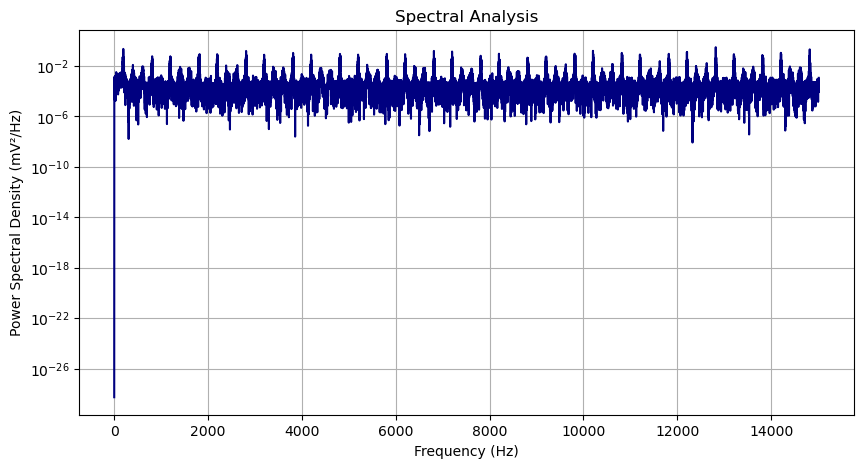

In [8]:
print("Purkinje Cell Voltage Analysis:")
try:
    voltage_results = analysis.analyze_voltage_data(PC_voltage_data)
    visualization.plot_spectral_analysis(voltage_results)
except ValueError as e:
    print(f"Analysis failed: {str(e)}")
    visualization.plot_voltage_trace(PC_voltage_data)

print("\nGranule Cell Voltage Analysis:")
try:
    voltage_results = analysis.analyze_voltage_data(GrC_voltage_data)
    visualization.plot_spectral_analysis(voltage_results)
except ValueError as e: 
    print(f"Analysis failed: {str(e)}")
    visualization.plot_voltage_trace(GrC_voltage_data)

print("\nGolgi Cell Voltage Analysis:")
try:
    voltage_results = analysis.analyze_voltage_data(GoC_voltage_data)
    visualization.plot_spectral_analysis(voltage_results)
except ValueError as e:
    print(f"Analysis failed: {str(e)}")
    visualization.plot_voltage_trace(GoC_voltage_data)



Created 2500 granule cells.
Created 64 Purkinje cells
Created 150 interneurons.
Created 30 Golgi cells.
Created 20 deep cerebellar nuclei cells.
Created 1500 mossy fibers.
Created 64 climbing fibers.
Number of mossy -> granule connections: 67307
Number of mossy -> golgi connections: 3625
Number of mossy -> DCN connections: 2346
Number of granule -> golgi connections: 320
Number of granule -> purkinje connections: 68036
Number of granule -> interneuron connections: 42009
Number of golgi -> granule connections: 5371
Number of golgi -> golgi connections: 109
Number of climbing -> purkinje connections: 64
Number of interneuron -> purkinje connections: 109
Number of interneuron -> interneuron connections: 3049
Number of purkinje -> DCN connections: 320
Network setup complete.


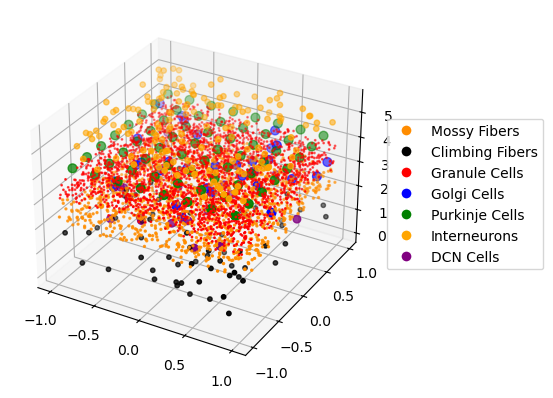

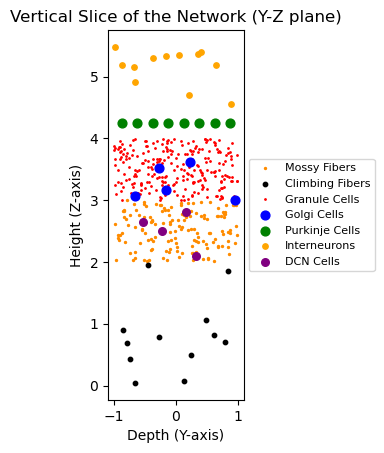

Connections from mossy_fibers to granule: 87
Connections from mossy_fibers to golgi: 3
Simulation running...
Simulation complete.


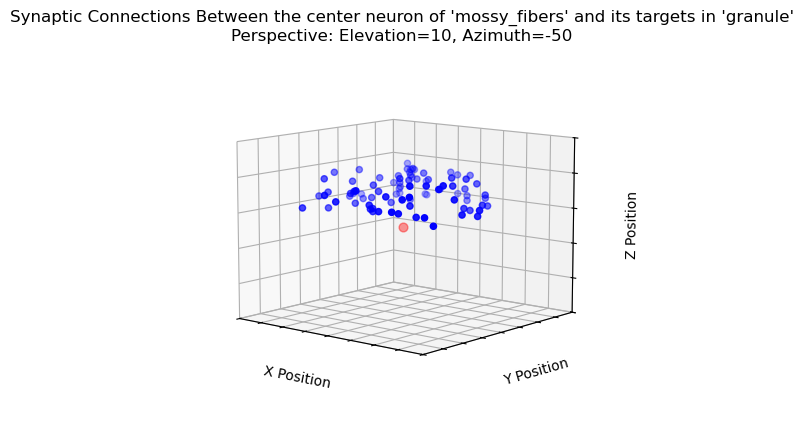

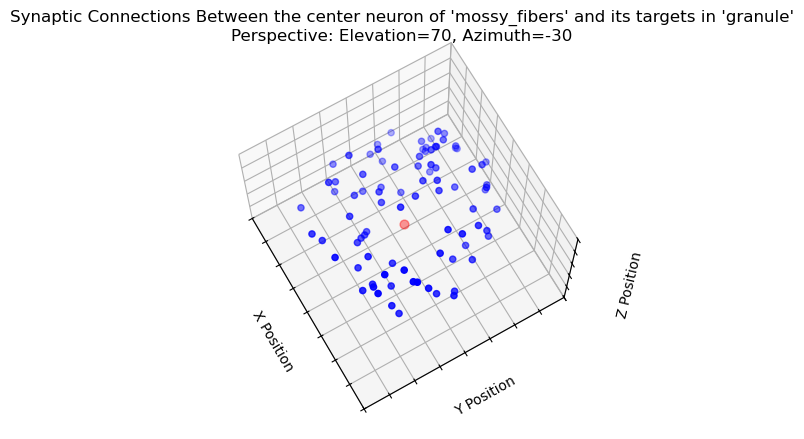

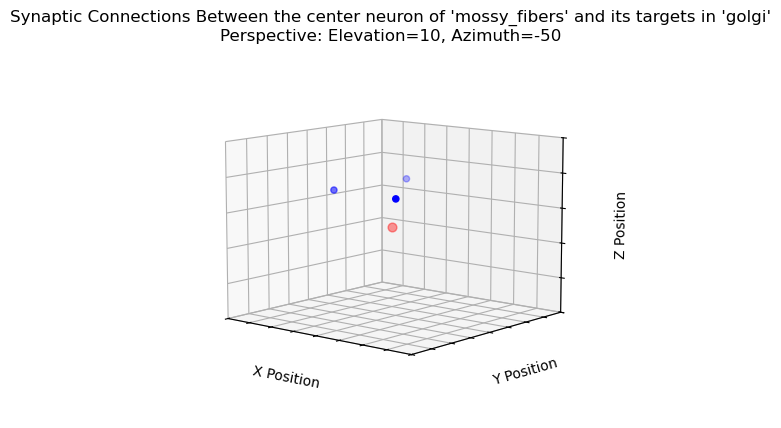

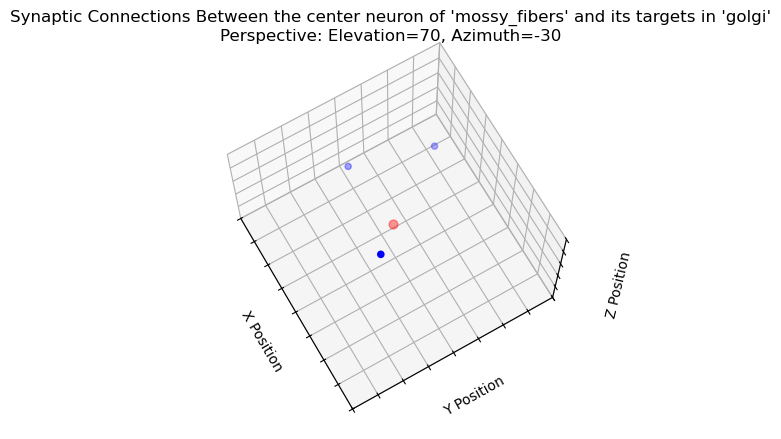

In [2]:
spatial_results = simulation.example_spatial_simulation()

The structure of the model was inspired by the following image which can be found in the "Cerebellar Modeling" lecture:
<SHOW THE IMAGE "Cerebellar Strucure.png">


In [3]:
## Analyze spatial results

# To make the analysis faster, we can skip the correlation analysis (~ 1hr)
skip_correlations = False

PC_spatial_spike_data = spatial_results["purkinje_spikes"]
PC_spatial_voltage_data = spatial_results["purkinje_voltages"]
GrC_spatial_spike_data = spatial_results["granule_spikes"]
GrC_spatial_voltage_data = spatial_results["granule_voltages"]
GoC_spatial_spike_data = spatial_results["golgi_spikes"]
GoC_spatial_voltage_data = spatial_results["golgi_voltages"]

PC_spatial_spike_results = analysis.analyze_spike_data(PC_spatial_spike_data, skip_correlations=skip_correlations)
GrC_spatial_spike_results = analysis.analyze_spike_data(GrC_spatial_spike_data, skip_correlations=skip_correlations)
GoC_spatial_spike_results = analysis.analyze_spike_data(GoC_spatial_spike_data, skip_correlations=skip_correlations)

PC_spatial_isis = analysis.get_isi_distribution(PC_spatial_spike_results["spike_trains"])
GrC_spatial_isis = analysis.get_isi_distribution(GrC_spatial_spike_results["spike_trains"])
GoC_spatial_isis = analysis.get_isi_distribution(GoC_spatial_spike_results["spike_trains"])

Starting spike data analysis with 1226 spikes from 57 neurons.
Created 57 spike trains.
Firing rates calculated - average: 21.53 Hz
ISI CV calculated - 56 valid values, average: 0.01
Calculating spike correlations for 57 neurons...


100%|██████████| 57/57 [00:00<00:00, 98.15it/s]


Average spike correlation: 0.02
Starting spike data analysis with 70995 spikes from 1704 neurons.
Created 1704 spike trains.
Firing rates calculated - average: 41.66 Hz
ISI CV calculated - 1652 valid values, average: 0.22
Calculating spike correlations for 1704 neurons...


100%|██████████| 1704/1704 [07:58<00:00,  3.56it/s]


Average spike correlation: 0.05
Starting spike data analysis with 2275 spikes from 29 neurons.
Created 29 spike trains.
Firing rates calculated - average: 78.46 Hz
ISI CV calculated - 29 valid values, average: 0.04
Calculating spike correlations for 29 neurons...


100%|██████████| 29/29 [00:00<00:00, 195.83it/s]


Average spike correlation: 0.32


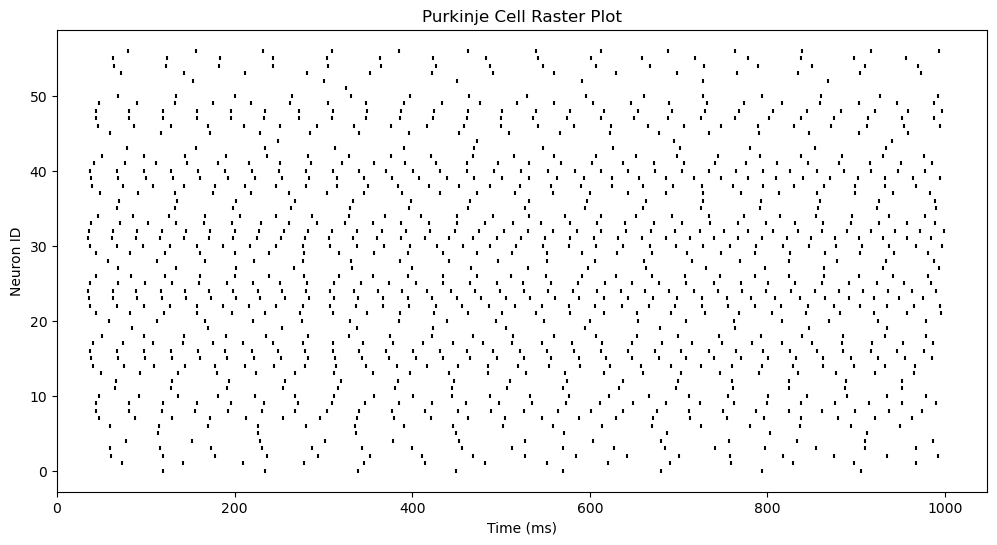

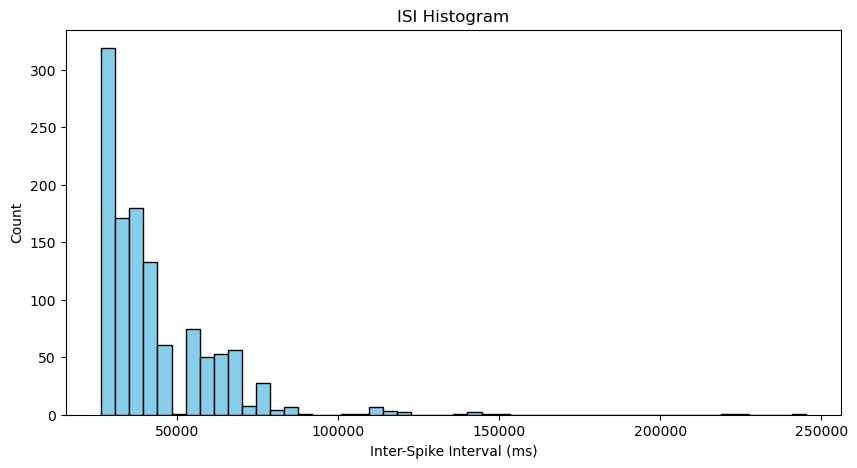

In [4]:
visualization.plot_raster(PC_spatial_spike_results, title="Purkinje Cell Raster Plot")
visualization.plot_isi_histogram(PC_spatial_isis)

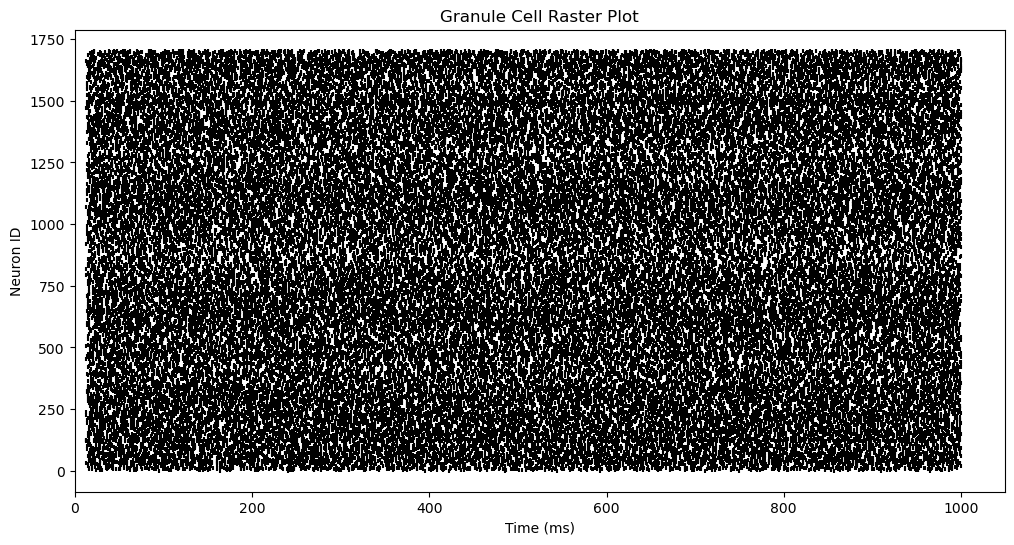

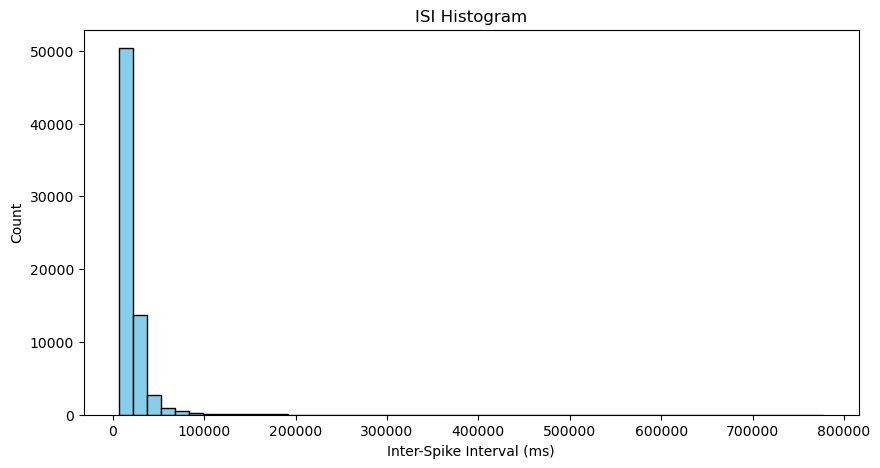

In [5]:
visualization.plot_raster(GrC_spatial_spike_results, title="Granule Cell Raster Plot")
visualization.plot_isi_histogram(GrC_spatial_isis)

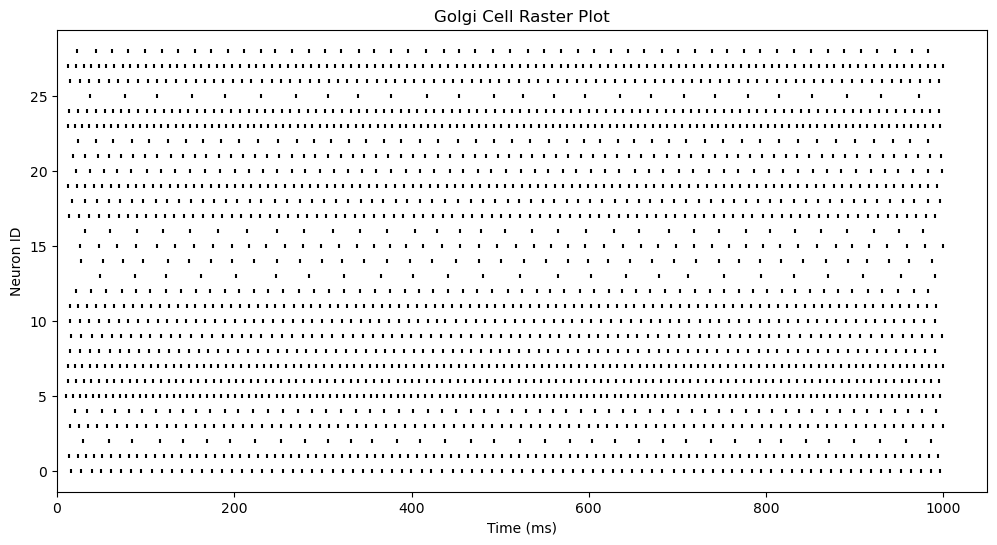

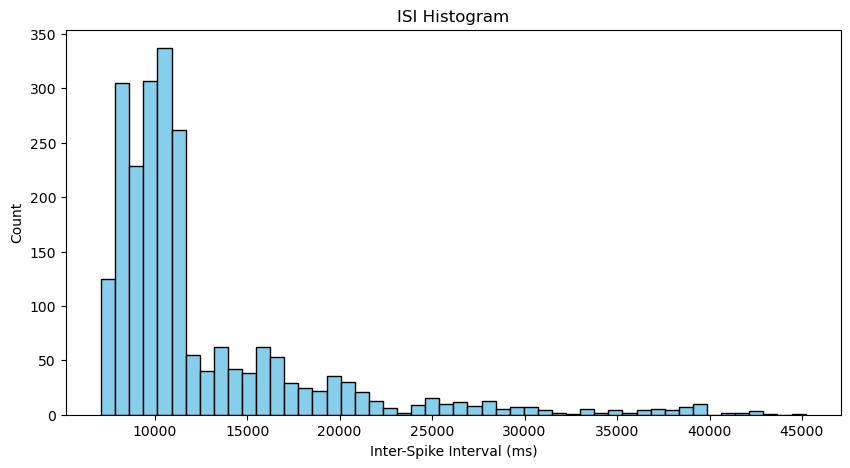

In [6]:
visualization.plot_raster(GoC_spatial_spike_results, title="Golgi Cell Raster Plot")
visualization.plot_isi_histogram(GoC_spatial_isis)

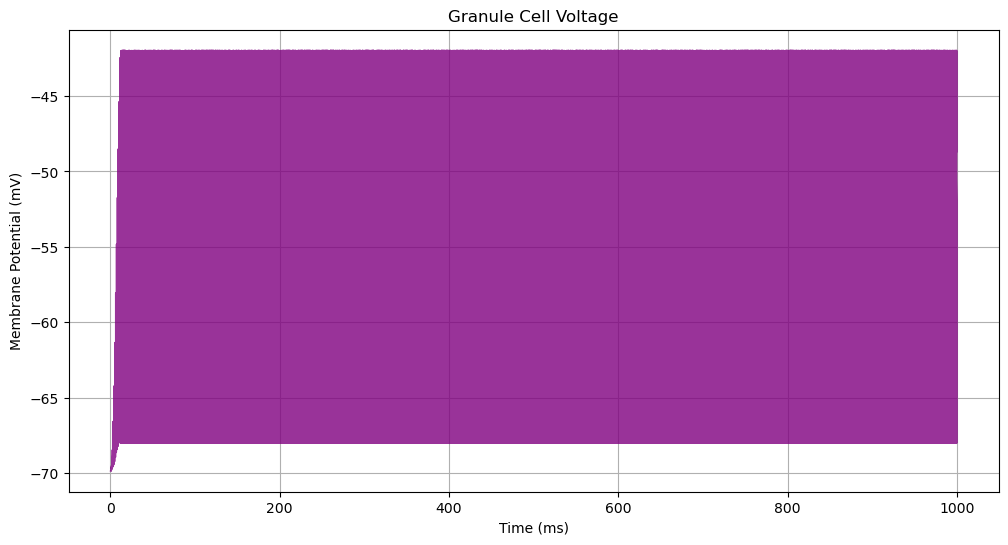

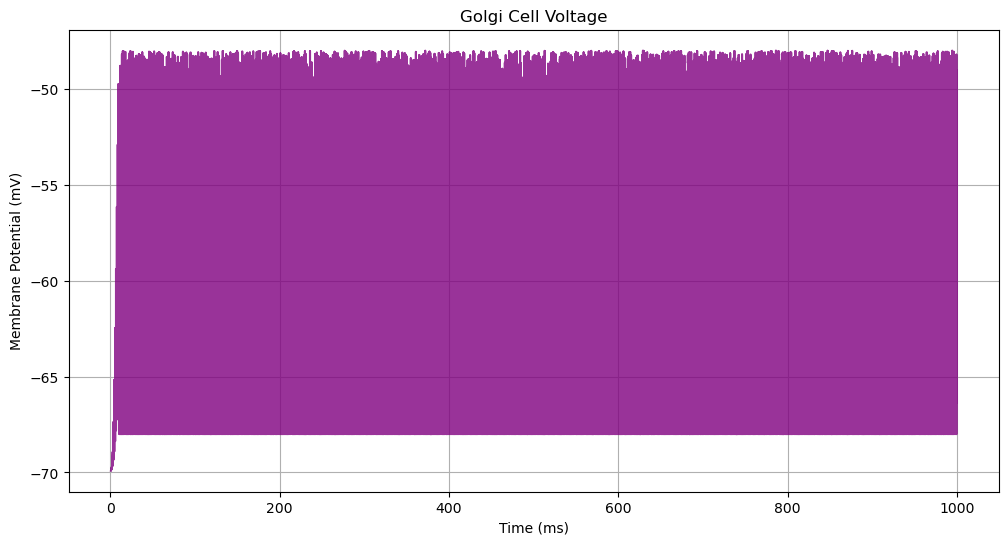

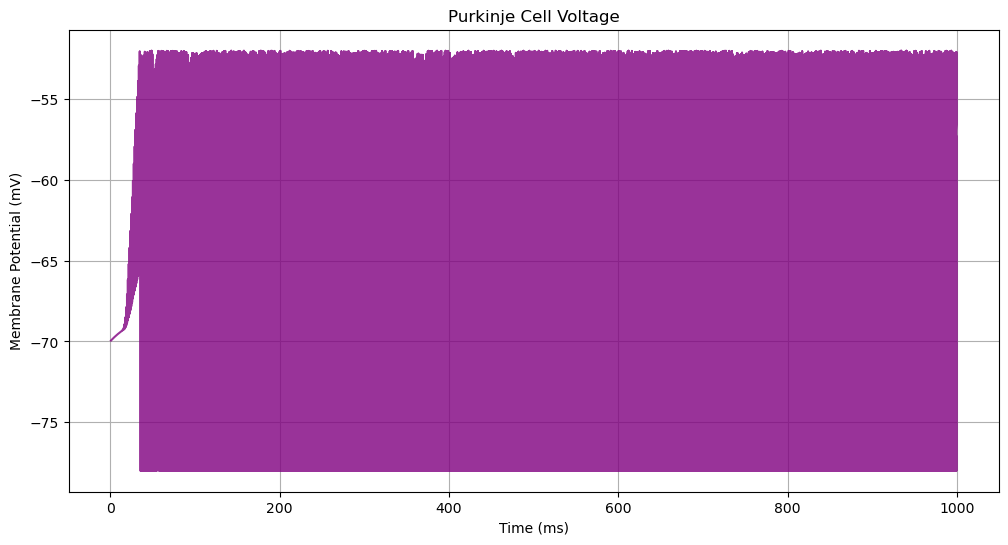

In [7]:
visualization.plot_voltage_trace(GrC_spatial_voltage_data, title="Granule Cell Voltage")
visualization.plot_voltage_trace(GoC_spatial_voltage_data, title="Golgi Cell Voltage")
visualization.plot_voltage_trace(PC_spatial_voltage_data, title="Purkinje Cell Voltage")

Purkinje Cell Voltage Analysis:

[Voltage Analysis] Starting analysis...
Analyzing 63936 samples over 998.0 ms
Calculated sampling rate: 64063.13 Hz
Total duration: 1.00 seconds
PSD parameters:
- Segment length: 1.00s (63935 samples)
- Overlap: 50.0%
- Segments: 1
PSD calculation failed: nperseg must be a positive integer
Attempting fallback to simple FFT...

[Voltage Analysis] Results:
- Dominant frequency: 8007.89 Hz
- Theta power (4-8 Hz): 3.86e-02 mV²/Hz
- Frequency range: 0.0-32031.6 Hz


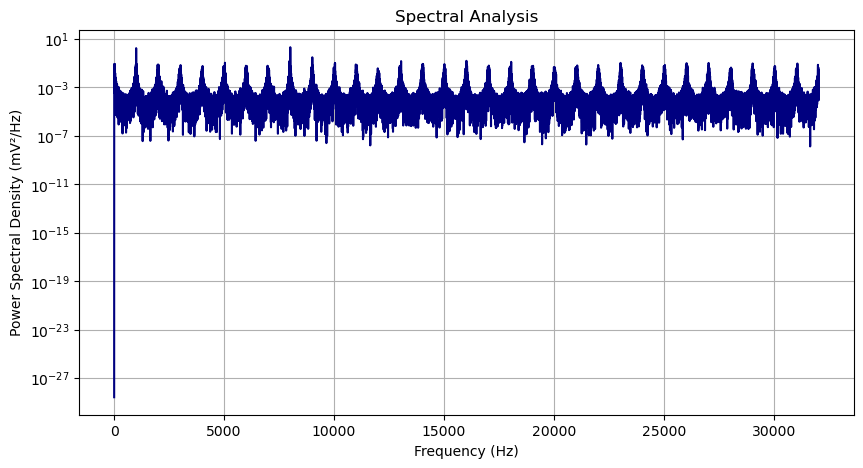


Granule Cell Voltage Analysis:

[Voltage Analysis] Starting analysis...
Analyzing 2497500 samples over 998.0 ms
Calculated sampling rate: 2502504.01 Hz
Total duration: 1.00 seconds
PSD parameters:
- Segment length: 1.00s (2497499 samples)
- Overlap: 50.0%
- Segments: 1
PSD calculation failed: nperseg must be a positive integer
Attempting fallback to simple FFT...

[Voltage Analysis] Results:
- Dominant frequency: 1.00 Hz
- Theta power (4-8 Hz): 1.08e-01 mV²/Hz
- Frequency range: 0.0-1251252.0 Hz


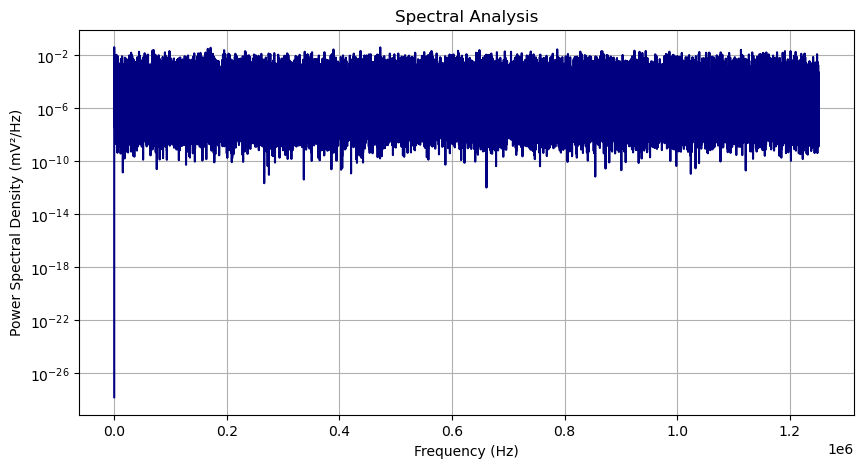


Golgi Cell Voltage Analysis:

[Voltage Analysis] Starting analysis...
Analyzing 29970 samples over 998.0 ms
Calculated sampling rate: 30029.06 Hz
Total duration: 1.00 seconds
PSD parameters:
- Segment length: 1.00s (29969 samples)
- Overlap: 50.0%
- Segments: 1
PSD calculation failed: nperseg must be a positive integer
Attempting fallback to simple FFT...

[Voltage Analysis] Results:
- Dominant frequency: 13012.59 Hz
- Theta power (4-8 Hz): 1.29e-02 mV²/Hz
- Frequency range: 0.0-15014.5 Hz


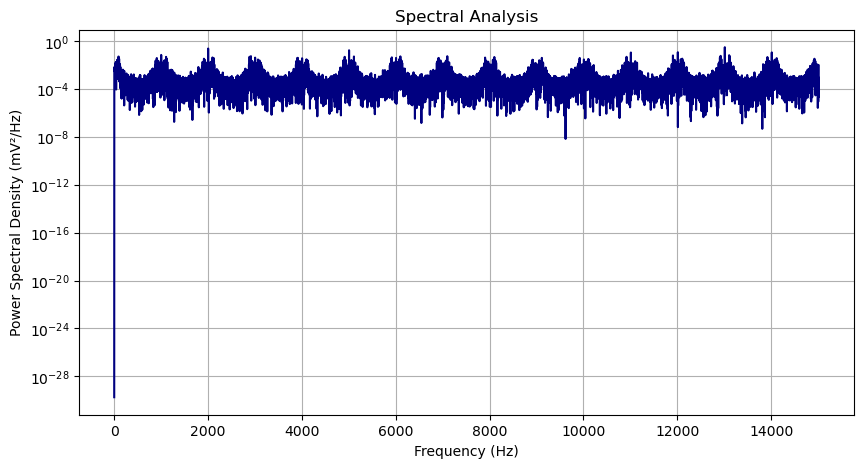

In [8]:
print("Purkinje Cell Voltage Analysis:")
try:
    voltage_results = analysis.analyze_voltage_data(PC_spatial_voltage_data)
    visualization.plot_spectral_analysis(voltage_results)
except ValueError as e:
    print(f"Analysis failed: {str(e)}")
    visualization.plot_voltage_trace(PC_spatial_voltage_data)

print("\nGranule Cell Voltage Analysis:")
try:
    voltage_results = analysis.analyze_voltage_data(GrC_spatial_voltage_data)
    visualization.plot_spectral_analysis(voltage_results)
except ValueError as e: 
    print(f"Analysis failed: {str(e)}")
    visualization.plot_voltage_trace(GrC_spatial_voltage_data)

print("\nGolgi Cell Voltage Analysis:")
try:
    voltage_results = analysis.analyze_voltage_data(GoC_spatial_voltage_data)
    visualization.plot_spectral_analysis(voltage_results)
except ValueError as e:
    print(f"Analysis failed: {str(e)}")
    visualization.plot_voltage_trace(GoC_spatial_voltage_data)